In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [177]:
df = pd.read_csv('medical.csv')
BMI = pd.Series(data = df['weight']/(df['height']/100)**2)
df['overweight'] = [1 if x > 25 else 0 for x in BMI]
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [182]:
# 0(bom) e 1(ruim) em colesterol
df['cholesterol'] = [0 if x == 1 else 1 for x in df['cholesterol']]
# 0(bom) e 1(ruim) em glicose
df['gluc'] = [0 if x == 1 else 1 for x in df['gluc']]
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,0,0,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,0,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,0,0,0,0,1,1


In [183]:
df2 = df.melt(id_vars = ['cardio'], value_vars=['active','alco','cholesterol','gluc','overweight', 'smoke'], var_name = 'condition')
df2.value_counts()

cardio  condition    value
1       alco         0        33156
0       alco         0        33080
1       smoke        0        32050
0       smoke        0        31781
        gluc         1        30894
        cholesterol  1        29330
        active       1        28643
1       gluc         1        28585
        active       1        27618
        overweight   1        24440
        cholesterol  1        23055
0       overweight   1        19106
                     0        15915
1       cholesterol  0        11924
        overweight   0        10539
        active       0         7361
        gluc         0         6394
0       active       0         6378
        cholesterol  0         5691
        gluc         0         4127
        smoke        1         3240
1       smoke        1         2929
0       alco         1         1941
1       alco         1         1823
dtype: int64

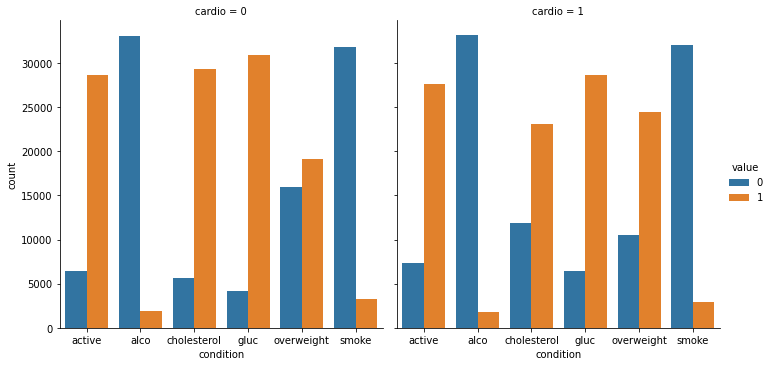

In [184]:
sns.catplot(data=df2, kind="count",  x="condition", hue="value", col="cardio")

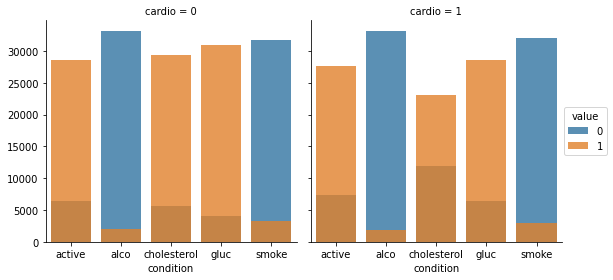

In [185]:
cardio = sns.FacetGrid(data = df2, col = 'cardio', hue = 'value', height = 4, hue_order=[0,1], sharex = True, sharey = True)
cardio.map(sns.countplot, 'condition', order=['active','alco','cholesterol','gluc','smoke'], dodge = True, alpha = 0.8)
plt.legend(loc=7,title = 'value',bbox_to_anchor=(1.2,0.5))

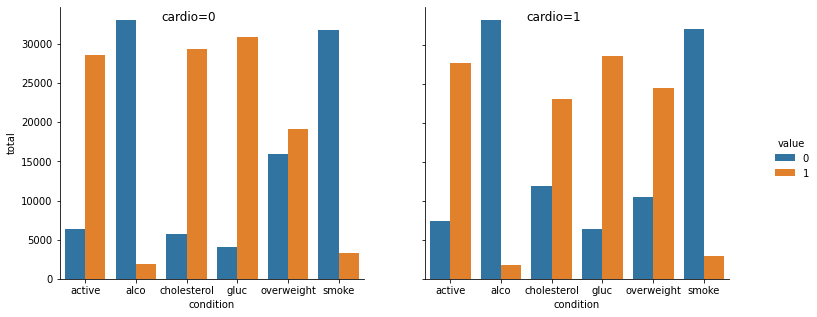

In [186]:
figure, (ax1, ax2) = plt.subplots(figsize=(12,5), nrows = 1, ncols = 2)
figure.set
#Gráficos
sns.countplot(x = 'condition', hue = 'value', data = df2[df2['cardio']==1], order = ['active','alco','cholesterol','gluc','overweight','smoke'], ax = ax2)
sns.countplot( x = 'condition', hue = 'value', data = df2[df2['cardio']==0], order = ['active','alco','cholesterol','gluc','overweight','smoke'], ax = ax1,)
#remove rotulo do eixo
ax2.set_ylabel('')
ax1.set_ylabel('total')
#remove valores nos ticks do eixo
ax2.yaxis.set_ticklabels([])
#Remove grids superior e direito no gráfico 2
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
#Remove grids superior e direito no gráfico 1
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#Define a legenda geral com base no gráfico1
handles, labels = ax1.get_legend_handles_labels()
#Remove as legendas individuais
ax1.get_legend().remove()
ax2.get_legend().remove()
#Posiciona a legenda principal 
figure.legend(handles, labels, loc=7, title = 'value', frameon = False)
#Texto central
ax1.text(1.5, 33000, 'cardio=0', fontsize =  12)
ax2.text(1.5, 33000, 'cardio=1', fontsize = 12)
plt.show()